In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Data Dictionary
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [2]:
# reading the data as csv format(Comma separated format)
df = pd.read_csv('train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
df.shape

(10886, 12)

## So, here are total of 10866 rows including 12 features or columns.

In [6]:
# Observing individual columns or attributes value counts
for i in df.columns:
    print(i,":",df[i].value_counts())
    print("-"*40)
    print("-"*40)

datetime : 2011-06-18 20:00:00    1
2011-07-13 14:00:00    1
2011-06-17 16:00:00    1
2012-08-16 04:00:00    1
2012-03-12 21:00:00    1
                      ..
2012-11-06 01:00:00    1
2011-06-04 07:00:00    1
2011-06-15 06:00:00    1
2012-07-17 12:00:00    1
2011-08-19 07:00:00    1
Name: datetime, Length: 10886, dtype: int64
----------------------------------------
----------------------------------------
season : 4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
----------------------------------------
----------------------------------------
holiday : 0    10575
1      311
Name: holiday, dtype: int64
----------------------------------------
----------------------------------------
workingday : 1    7412
0    3474
Name: workingday, dtype: int64
----------------------------------------
----------------------------------------
weather : 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
----------------------------------------
-----------------------

In [7]:
# Observing individual columns or attributes unique values
for i in df.columns:
    print(i,":",df[i].unique())
    print("-"*40)
    print("-"*40)

datetime : ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
----------------------------------------
----------------------------------------
season : [1 2 3 4]
----------------------------------------
----------------------------------------
holiday : [0 1]
----------------------------------------
----------------------------------------
workingday : [0 1]
----------------------------------------
----------------------------------------
weather : [1 2 3 4]
----------------------------------------
----------------------------------------
temp : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
----------------------------------------
-------------------

In [8]:
# Checking the datatypes of each individual attributes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## It seems like all the attributes are numerical datatypes except datetime which is an object, in Machine Learning and DataScience it is very important to convert the values in numerical format as Machine can only understand numbers. Later datetime will be converted to separate days, months and year so that more insights of the data can be drawn.

In [11]:
df['datetime'].dtypes

dtype('O')

In [12]:
# Let's confirm that all the attributes in the given dataset are numerical except datetime object.
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

season
holiday
workingday
weather
temp
atemp
humidity
windspeed
casual
registered
count


# Checking whether the there is any null value present in the dataset as null values creates problem while preprocessing the data while using algorithms.


In [13]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## Let's visualize this on the graph

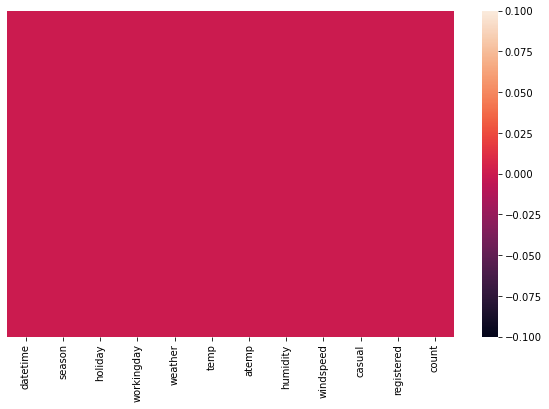

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.isna(),yticklabels=False)

## We can see that we don't have any missing values, if there were any missing value we have to fill the missing data either using mean, median or mode. Missing data creates a problem while analyzing the data set in realtime.

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df['datetime'].value_counts()

2011-06-18 20:00:00    1
2011-07-13 14:00:00    1
2011-06-17 16:00:00    1
2012-08-16 04:00:00    1
2012-03-12 21:00:00    1
                      ..
2012-11-06 01:00:00    1
2011-06-04 07:00:00    1
2011-06-15 06:00:00    1
2012-07-17 12:00:00    1
2011-08-19 07:00:00    1
Name: datetime, Length: 10886, dtype: int64

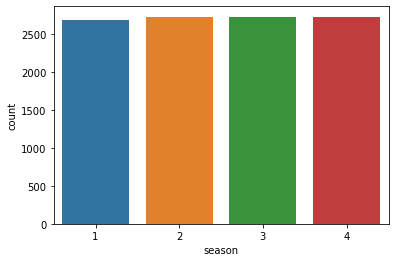

In [17]:
sns.countplot(x='season',data=df)
plt.show()

## We can see that the number of seasons regsitered in the dataset are almost same. It seems that (1=spring) season is slightly less compared to other seasons.

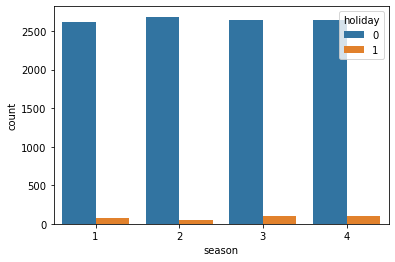

In [18]:
sns.countplot(x='season',hue='holiday',data=df);

## It is clear that the day that is consired as holiday is very less compared to the day that is considered its not a holiday. In all the seasons (1=spring, 2=summer,3=fall,4=winter), the day that is considered non holiday is very large compared to day that is considered holiday.

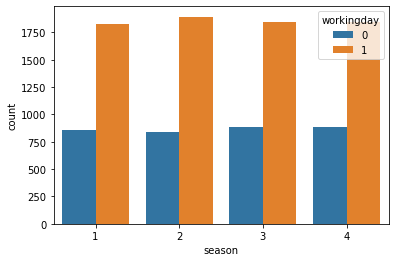

In [21]:
sns.countplot(x='season',hue='workingday',data=df);

# It seems that non-working day is about 800 in all the season whereas working day in all the seasons are more than 1750.

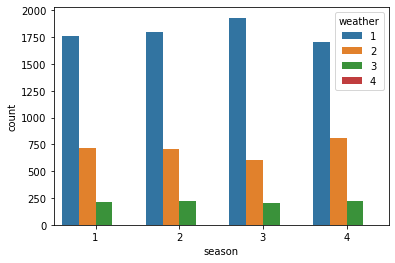

In [22]:
sns.countplot(x='season',hue='weather',data=df);

## It seems almost all the season have (1=Clear, Few clouds, Partly cloudy, Partly cloudy) compared to (3=3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). We cannot see any weather(4=4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) as the entry for this weather data was only one so it is not noticable in our chart.

In [23]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [34]:
df[df['weather']==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [35]:
len(df[df['weather']==4])

1

## It is clear from here that the weather(4=Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) has only one row and it is contributing very less to the dataset.

In [36]:
len(df[df['weather']==1])

7192

In [37]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [38]:
df['temp'].max()

41.0

In [39]:
## The maximum temperature in the given dataset is 41.0 degree celcius

In [40]:
df['temp'].min()

0.82

In [41]:
## The manimum temperature in the given dataset is  0.82 degree celcius

## Now lets check the distribution of the dataset weather the attributes we have are skewed or not using histogram

In [42]:
df_num = df[['temp','atemp','humidity','casual','registered','count']]

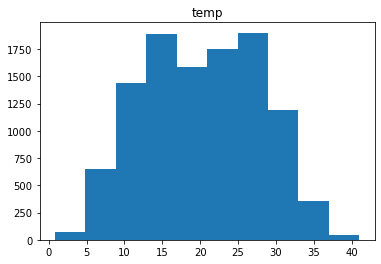

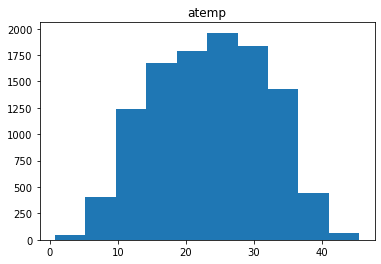

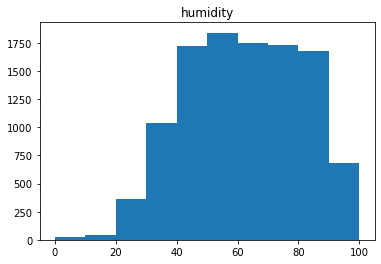

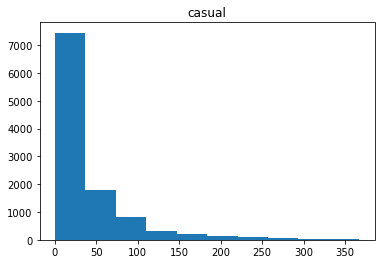

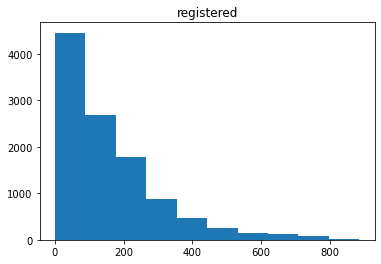

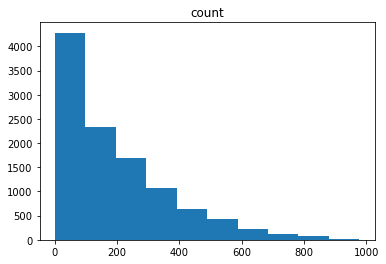

In [43]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

## From the above dataset the distribution of temp, atemp, humidity seems distributed normally while other attributes are right skewed. Such skewness can be solved by taking the logarithms of the attributes.

In [46]:
## Ways to take logarithmic
##df['casual'] = np.log1p(df['casual'])

In [45]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


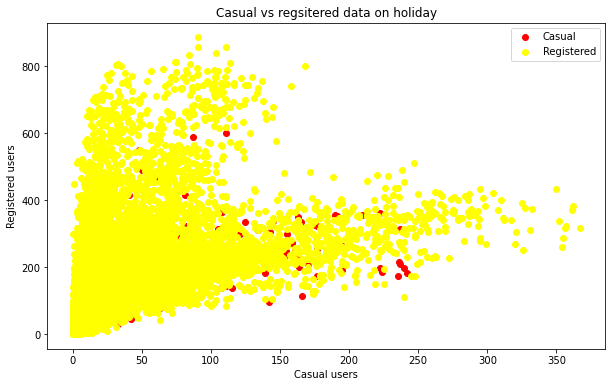

In [47]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with holiday examples
plt.scatter(df.casual[df.holiday==1],
            df.registered[df.holiday==1],
            c="red")

# Scatter with non-holiday examples
plt.scatter(df.casual[df.holiday==0],
            df.registered[df.holiday==0],
            c="yellow")

# Add some helpful info
plt.title("Casual vs regsitered data on holiday")
plt.xlabel("Casual users")
plt.ylabel("Registered users")
plt.legend(["Casual", "Registered"]);

## So the number we can see the spread of holday attribute in the casual and registered users.

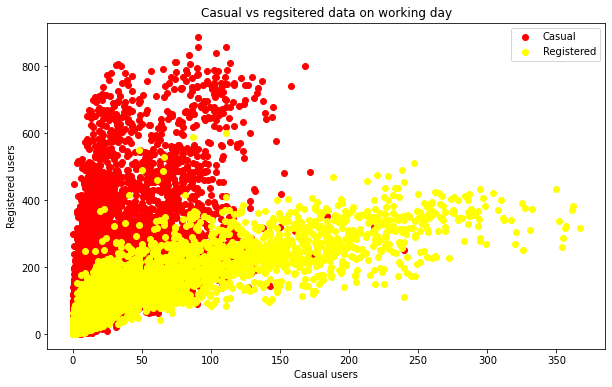

In [49]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with holiday examples
plt.scatter(df.casual[df.workingday==1],
            df.registered[df.workingday==1],
            c="red")

# Scatter with non-holiday examples
plt.scatter(df.casual[df.workingday==0],
            df.registered[df.workingday==0],
            c="yellow")

# Add some helpful info
plt.title("Casual vs regsitered data on working day")
plt.xlabel("Casual users")
plt.ylabel("Registered users")
plt.legend(["Casual", "Registered"]);

## So the number we can see the spread of workinng day attribute in the casual and registered users.

In [50]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Now let's convert the datetime object in time format

In [51]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [52]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Adding new column from the datatime attribute as a monthm day, year so that it will help us to visualize data very easily further.

In [56]:
df['month'] = df.datetime.dt.month

In [57]:
df['day'] = df.datetime.dt.day

In [58]:
df['year'] =df.datetime.dt.year

In [59]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011


In [60]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,2012
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,12,19,2012


## Now it is more clear that the dataset was collected in the year 2011 till 2012.

### Now I can drop the datetime attribute as we have already extracted month, day, year which will be sufficient for us to exract the infromation.

In [62]:
df.drop('datetime',axis=1,inplace=True)

In [63]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011


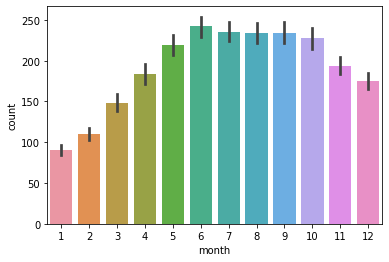

In [64]:
sns.barplot(x='month',y='count',data=df)
plt.show()

## It is observable that the number of total rental is very large is 6(in June) while less in (1=Janaury)

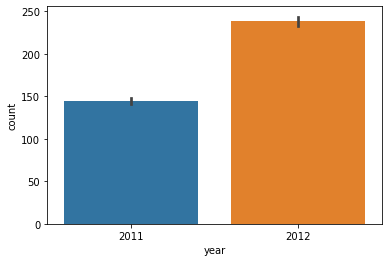

In [65]:
sns.barplot(x='year',y='count',data=df)
plt.show()

## It is clear that the number of total rentals registered in the dataset is more in 2012 than in 2011. Almost around total count no nearly 150 was registered in 2011 while around 240 count were registered in 2012. 

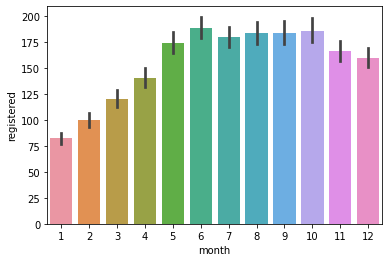

In [71]:
sns.barplot(x='month',y='registered',data=df)
plt.show()

## the number of registered user is more in (6=June) and less in (1=January)

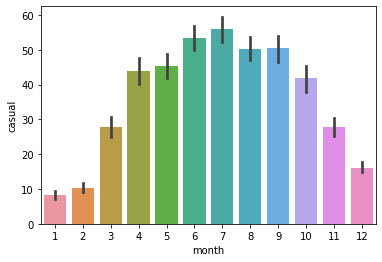

In [70]:
sns.barplot(x='month',y='casual',data=df)
plt.show()

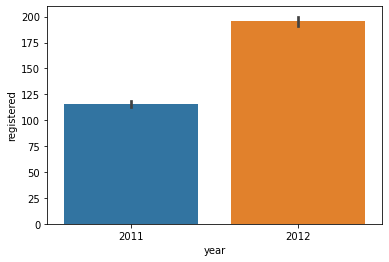

In [72]:
sns.barplot(x='year',y='registered',data=df)
plt.show()

## So there are around 115 registred user in 2011 while it grew to around 180 in 2012.

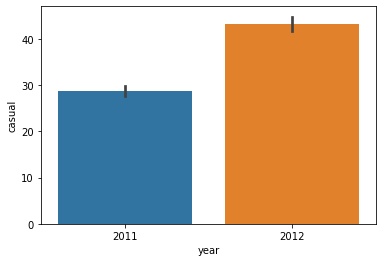

In [74]:
sns.barplot(x='year',y='casual',data=df)
plt.show()

>> the number of casual user is more in (7=July) and less in (1=January). Similarly, the number of non-registred casual users are around 28 in 2011 while it increased to around 42 in 2012. From this chart we are very clear that the number of registered user( from the chart above) is more than casual users.



In [68]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011


In [67]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
month           int64
day             int64
year            int64
dtype: object

## Now all the datatypes we have are in numerical format which willbe very effective while preprocessing the data using algorithms.

In [77]:
df['humidity'].max()

100

In [78]:
df['humidity'].min()

0

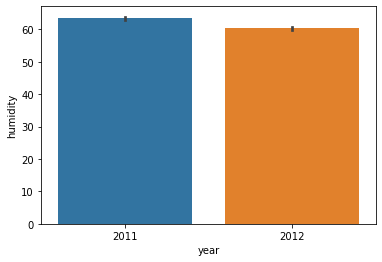

In [82]:
sns.barplot(x='year',y='humidity',data=df)
plt.show()

In [91]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011


In [94]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,2012
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,2012
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,2012
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,2012
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,12,19,2012


In [95]:
df_last_ten_days = df.tail()

In [97]:
df_last_ten_days

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,2012
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,2012
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,2012
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,2012
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,12,19,2012


## Now lets observe the overall correlation between the datasets

In [98]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,0.001729,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.015877,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,0.009829,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.007890,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.015551,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.011866,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.011335,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,0.036157,-0.015221
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.014109,0.145241
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.019111,0.264265


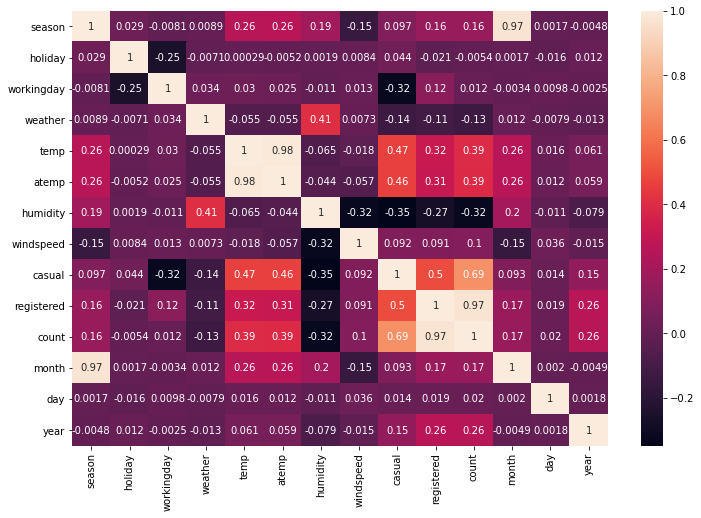

In [102]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

## If the value of correlation is 1 it means it is highly correlated and if it is -1, it means that it has negative correlation. We can see different correlations here,compared to salary, working day and year has high negative correlation while month has huge postive correlation on the dataset.